In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from tree import Tree
import tree_to_prism as tp

In [2]:
path = 'experiments/experiment 3'
file = 'ExecuteArbitraryCode'
tree = Tree()
tree = tp.parse_file(f"{path}/trees/{file}.xml")
tree.root.to_string()

'Label: ExecuteArbitraryCode\nRefinement: disjunctive\nType: Goal\nAction: \nCost: \nRole: Attacker'

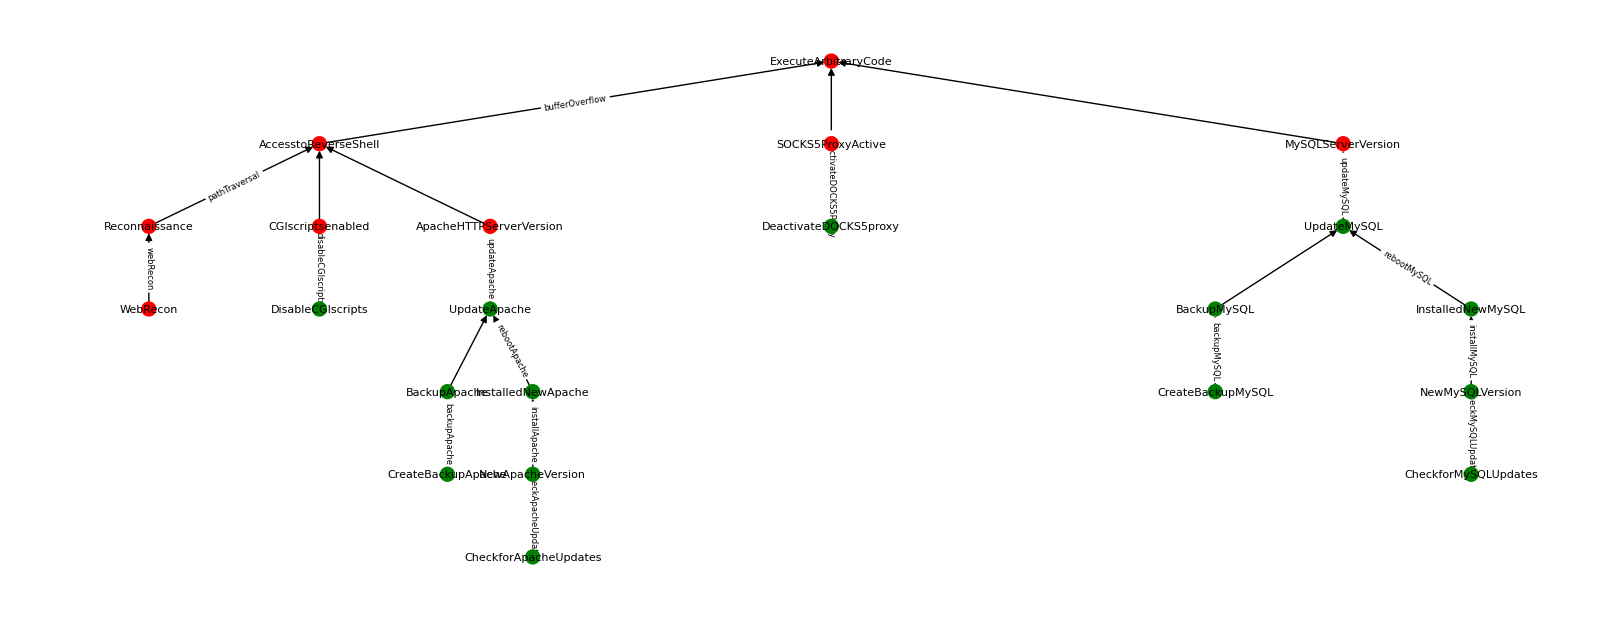

In [3]:
G = tree.to_graph()

fig = plt.figure(figsize=(16, 6))
pos = tree.hierarchy_pos(G, tree.root.label, width=500, xcenter=0.5) # get the position of the nodes

colors = []
for node in G.nodes: 
    colors.append(G.nodes[node]['color']) 
    
nx.draw(nx.reverse(G), pos, node_color=colors, with_labels=True, arrows=True, node_size=100, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'action') # get the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6) 

plt.show()

In [4]:
string = tp.get_prism_model(tree) # get the prism model as a string
string_time = tp.get_prism_model_time(tree)

In [5]:
tp.save_prism_model(string, f"{path}/prism/{file}.prism")  # save the model to a prism file
tp.save_prism_model(string_time, f"{path}/prism/{file}_time.prism")